In [ ]:
# Learn Platform COVID-19 Impact on Digital Learning

1. Description

Current research shows educational outcomes are far from equitable. The imbalance was exacerbated
by the COVID-19 pandemic. There's an urgent need to better understand and measure the scope and 
impact of the pandemic on these inequities.Education technology company Learn Platform was founded 
in 2014 with a mission to expand equitable access to education technology for all students and teachers.
Learn Platform’s comprehensive edtech effectiveness system is used by districts and states to 
continuously improve the safety, equity, and effectiveness of their educational technology. 
Learn Platform does so by generating an evidence basis for what’s working and enacting it to benefit
students, teachers, and budgets.

2 Problem Statements

The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States.
In the spring of 2020, most states and local governments across the U.S. closed educational 
institutions to stop the spread of the virus. In response, schools and teachers have attempted to 
reach students remotely through distance learning tools and digital platforms. Until today, concerns
of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners
continue to grow.

3. Our Objective

We are asked to analysis the given data about how engagement with digital learning relates to factors 
like district demographics, broadband access, and state/national level policies and events. Then, 
we will propose a solution to these educational inequities.

4. DATA

kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [10]:
import pandas as pd
import numpy as np  
import seaborn as sns 
pal = sns.color_palette()
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import glob
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

In [ ]:
Loading Data

In [11]:
import pandas as pd
districts = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
products = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")

In [12]:
import pandas as pd
import glob

path = r'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_eng = pd.concat(li, axis=0, ignore_index=True)

In [13]:
# Checking number of rows and columns and the first five rows of both dataframes
print('DISTRICTS - Rows and Columns:',districts.shape)
display(districts.head(3))
print('\nPRODUCTS - Rows and Columns:',products.shape)
display(products.head(3))

DISTRICTS - Rows and Columns: (233, 7)


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["



PRODUCTS - Rows and Columns: (372, 6)


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."


In [14]:
engagement = pd.concat(li)
engagement = engagement.reset_index(drop=True)
print('ENGAGEMENT DATA - Rows and Columns:', engagement.shape)
engagement.head(3)

ENGAGEMENT DATA - Rows and Columns: (22324190, 4)


,time,lp_id,pct_access,engagement_index
0,2020-01-01,92844.0,0.01,0.68
1,2020-01-01,64838.0,0.01,0.68
2,2020-01-01,94058.0,0.00,NaN


In [15]:
# Looking at colum names, data types and first overview of missing data 
print('DISTRICTS:\n')
display(districts.info())
print('\n\nPRODUCTS:\n')
display(products.info())
print('\n\nENGAGEMENT:\n')
display(engagement.info())

DISTRICTS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


None



PRODUCTS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


None



ENGAGEMENT:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
dtypes: float64(3), object(1)
memory usage: 681.3+ MB


None

In [16]:
print('DISTRICTS:')
display(districts.describe(include = 'all'))
print('PRODUCTS:')
display(products.describe(include = 'all'))
print('ENGAGEMENT:')
display(engagement.describe(include = 'all'))

DISTRICTS:


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,176,176,176,148,162,118
unique,NaN,23,4,5,5,2,11
top,NaN,Connecticut,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
freq,NaN,30,104,116,48,161,30
mean,5219.776824,NaN,NaN,NaN,NaN,NaN,NaN
std,2595.751581,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2991.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4937.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7660.000000,NaN,NaN,NaN,NaN,NaN,NaN


PRODUCTS:


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
count,372.000000,372,372,371,352,352
unique,NaN,372,372,290,5,35
top,NaN,https://outlook.live.com/owa/,SplashLearn,Google LLC,PreK-12,LC - Digital Learning Platforms
freq,NaN,1,1,30,170,74
mean,54565.795699,NaN,NaN,NaN,NaN,NaN
std,26247.551437,NaN,NaN,NaN,NaN,NaN
min,10533.000000,NaN,NaN,NaN,NaN,NaN
25%,30451.000000,NaN,NaN,NaN,NaN,NaN
50%,53942.500000,NaN,NaN,NaN,NaN,NaN
75%,77497.000000,NaN,NaN,NaN,NaN,NaN


ENGAGEMENT:


,time,lp_id,pct_access,engagement_index
count,22324190,2.232365e+07,2.231074e+07,1.694578e+07
unique,366,NaN,NaN,NaN
top,2020-12-10,NaN,NaN,NaN
freq,102833,NaN,NaN,NaN
mean,NaN,5.470879e+04,5.042399e-01,1.676063e+02
std,NaN,2.647069e+04,3.180568e+00,1.682223e+03
min,NaN,1.000300e+04,0.000000e+00,1.000000e-02
25%,NaN,3.085100e+04,0.000000e+00,3.700000e-01
50%,NaN,5.500700e+04,2.000000e-02,1.920000e+00
75%,NaN,7.766000e+04,9.000000e-02,1.365000e+01


In [ ]:
#Cleaning Data¶


In [17]:
# Identifying duplicate values 
print('DUPLICATES\nDistricts:\t',districts.duplicated().sum(),'\nProducts:\t', products.duplicated().sum(),'\nEngagement:\t', engagement.duplicated().sum())

DUPLICATES
Districts:	 0 
Products:	 0 
Engagement:	 5061714


In [18]:
current=len(engagement)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  22324190


In [19]:
engagement=engagement.drop_duplicates()

In [23]:
diff=current
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  22324190


In [ ]:
Standardization

In [15]:
products.columns = products.columns.str.lower()
list(products)

['lp id',
 'url',
 'product name',
 'provider/company name',
 'sector(s)',
 'primary essential function']

In [16]:
products.rename(columns={'lp id':'lp_id','product name':'product_name', 'provider/company name':'company_name','sector(s)': 'sectors', 'primary essential function':'function'}, inplace=True)
list(products)

['lp_id', 'url', 'product_name', 'company_name', 'sectors', 'function']

In [17]:
districts.rename(columns={'pct_black/hispanic':'pct_black_hispanic','pct_free/reduced':'pct_free_reduced'}, inplace=True)
list(districts)

['district_id',
 'state',
 'locale',
 'pct_black_hispanic',
 'pct_free_reduced',
 'county_connections_ratio',
 'pp_total_raw']

In [ ]:
Identifying Missing Values

In [18]:
# Finding the amount of missing values in each column
print('\nMISSING VALUES IN PRODUCTS:')
print(products.isnull().sum().sort_values(ascending = False))
print('\nMISSING VALUES IN DISTRICTS:')
print(districts.isnull().sum().sort_values(ascending = False))
print('\nMISSING VALUES IN ENGAGEMENT:')
print(engagement.isnull().sum().sort_values(ascending = False))


MISSING VALUES IN PRODUCTS:
sectors         20
function        20
company_name     1
lp_id            0
url              0
product_name     0
dtype: int64

MISSING VALUES IN DISTRICTS:
pp_total_raw                115
pct_free_reduced             85
county_connections_ratio     71
state                        57
locale                       57
pct_black_hispanic           57
district_id                   0
dtype: int64

MISSING VALUES IN ENGAGEMENT:
engagement_index    800702
pct_access            8463
lp_id                  521
time                     0
dtype: int64


In [19]:
print('\nPERCENTAGE OF MISSING VALUES IN PRODUCTS:')
for col in products.columns:
    missing_products = np.mean(products[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_products*100))

print('\nPERCENTAGE OF MISSING VALUES IN DISTRICTS:')
for col in districts.columns:
    missing_districts = np.mean(districts[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_districts*100))

print('\nPERCENTAGE OF MISSING VALUES IN ENGAGEMENT:')
for col in engagement.columns:
    missing_engagement = np.mean(engagement[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_engagement*100))


PERCENTAGE OF MISSING VALUES IN PRODUCTS:
lp_id:  0.00%
url:  0.00%
product_name:  0.00%
company_name:  0.27%
sectors:  5.38%
function:  5.38%

PERCENTAGE OF MISSING VALUES IN DISTRICTS:
district_id:  0.00%
state:  24.46%
locale:  24.46%
pct_black_hispanic:  24.46%
pct_free_reduced:  36.48%
county_connections_ratio:  30.47%
pp_total_raw:  49.36%

PERCENTAGE OF MISSING VALUES IN ENGAGEMENT:
time:  0.00%
lp_id:  0.00%
pct_access:  0.05%
engagement_index:  4.64%


In [ ]:
Handling Missing Values

In [ ]:
#PRODUCTS¶


In [20]:
# Deleting rows of missing values in 'products' dataframe, as these twoe cannot be reproduced
products.dropna(subset=["function", "sectors"], axis=0, inplace=True)
products.reset_index(inplace=True, drop=True)
products.isnull().sum()

lp_id           0
url             0
product_name    0
company_name    0
sectors         0
function        0
dtype: int64

In [21]:
# Deleting the column 'url'
products.drop("url", axis=1, inplace=True)
list(products)

['lp_id', 'product_name', 'company_name', 'sectors', 'function']

In [ ]:
#Districts

In [22]:
# Rows of missing values in 'state'
districts[districts.state.isnull()][:10]

,district_id,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
17,8515,NaN,NaN,NaN,NaN,NaN,NaN
19,2339,NaN,NaN,NaN,NaN,NaN,NaN
23,9120,NaN,NaN,NaN,NaN,NaN,NaN
25,4666,NaN,NaN,NaN,NaN,NaN,NaN
29,1131,NaN,NaN,NaN,NaN,NaN,NaN
30,4591,NaN,NaN,NaN,NaN,NaN,NaN
31,3393,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Deleting rows of missing values in 'districts' dataframe, as missing values in 'state' are useless for the EDA
districts.dropna(subset=["state", "pp_total_raw", "pct_free_reduced"], axis=0, inplace=True)
districts.reset_index(inplace=True, drop=True)
districts.isnull().sum().sort_values(ascending=False)

county_connections_ratio    4
district_id                 0
state                       0
locale                      0
pct_black_hispanic          0
pct_free_reduced            0
pp_total_raw                0
dtype: int64

In [24]:
# Checking the unique values of 'county_connections_ratio' in order to decide how to replace the missing values
districts.groupby('county_connections_ratio').sum()

,district_id
county_connections_ratio,
"[0.18, 1[",453042


In [25]:
# Deleting the column
districts.drop("county_connections_ratio", axis=1, inplace=True)
districts.head(3)

,district_id,state,locale,pct_black_hispanic,pct_free_reduced,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000["


In [ ]:
#Engagement

In [26]:
engagement.isnull().sum().sort_values(ascending=False)

engagement_index    800702
pct_access            8463
lp_id                  521
time                     0
dtype: int64

In [27]:
# Rows of missing values in 'pct_acess'
engagement[engagement.pct_access.isnull()][:10]


,time,lp_id,pct_access,engagement_index
3021728,2020-01-01,90153.0,NaN,NaN
3021729,2020-01-01,32654.0,NaN,NaN
3021730,2020-01-01,28504.0,NaN,NaN
3021731,2020-01-01,26488.0,NaN,NaN
3021732,2020-01-01,95731.0,NaN,NaN
3021733,2020-01-01,72758.0,NaN,NaN
3021734,2020-01-01,99916.0,NaN,NaN
3021735,2020-01-02,72758.0,NaN,NaN
3021736,2020-01-02,95731.0,NaN,NaN
3021737,2020-01-02,32654.0,NaN,NaN


In [28]:
# Deleting rows of missing values in these columns
engagement.dropna(subset=["engagement_index", "lp_id"], axis=0, inplace=True)
engagement.isnull().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
dtype: int64

In [ ]:
#Data Visualization

In [ ]:
#Univariate Analysis of Districts

In [ ]:
#Distribution of state

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Utah'),
  Text(2, 0, 'Wisconsin'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Missouri'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'New York'),
  Text(7, 0, 'Indiana'),
  Text(8, 0, 'Virginia'),
  Text(9, 0, 'New Jersey'),
  Text(10, 0, 'Minnesota'),
  Text(11, 0, 'Texas'),
  Text(12, 0, 'Florida'),
  Text(13, 0, 'Michigan')])

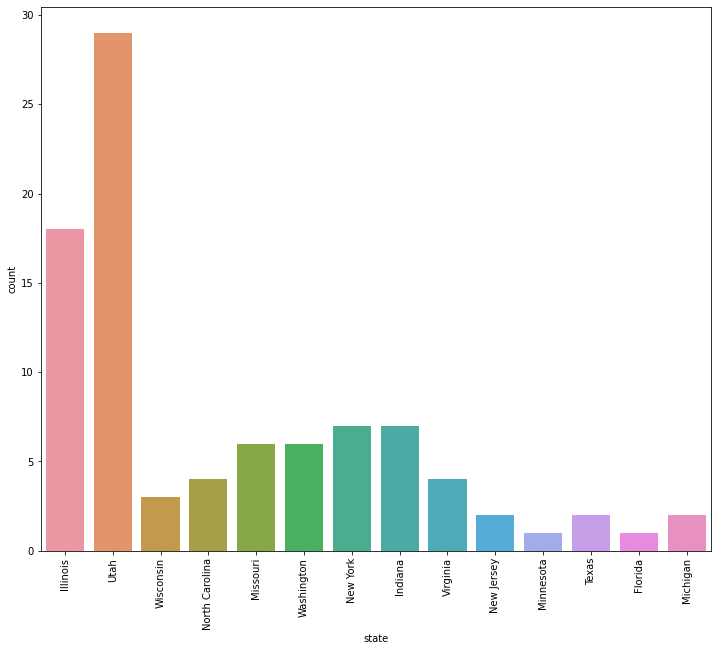

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(districts.state)
plt.xticks(rotation=90)

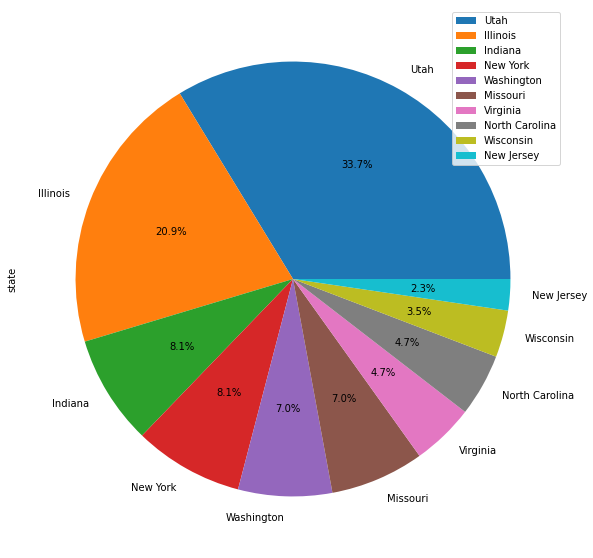

In [34]:
districts["state"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [ ]:
#Distribution of locale

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Suburb'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'City'),
  Text(3, 0, 'Town')])

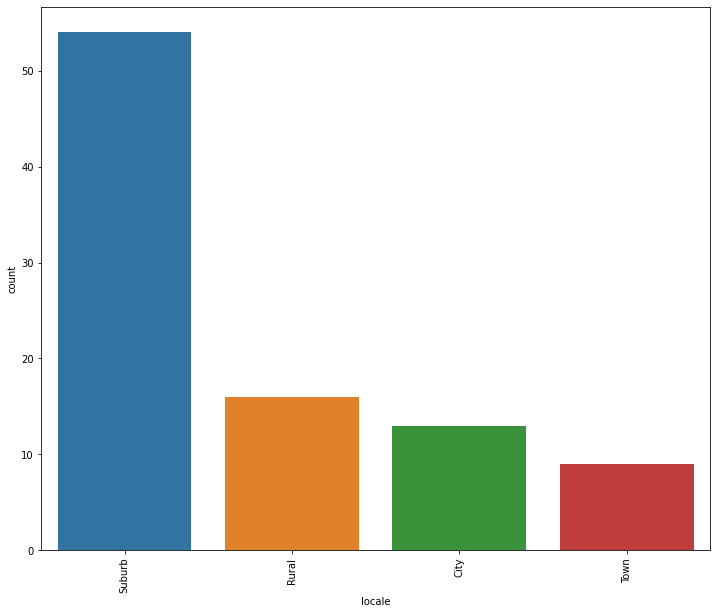

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(districts.locale)
plt.xticks(rotation=90)

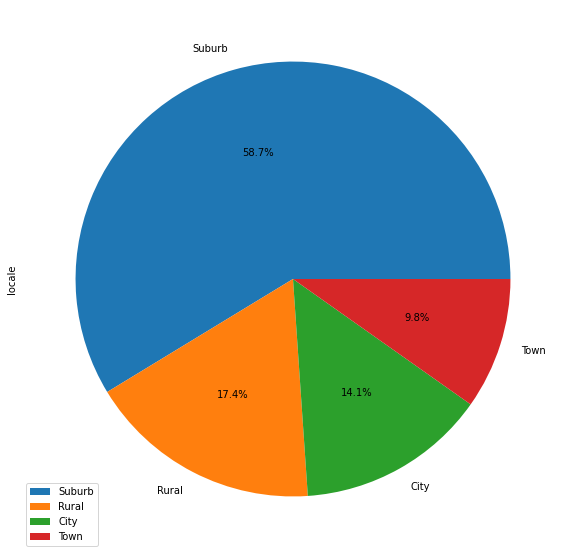

In [36]:
districts["locale"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [ ]:
#Distribution of pct_black/hispanic

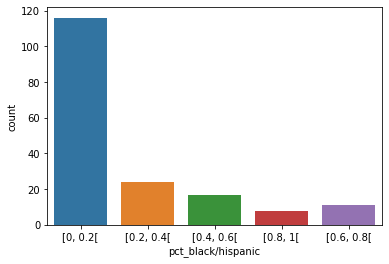

In [47]:
sns.countplot(data= districts, x = "pct_black/hispanic")
plt.show()

In [ ]:
#pct_free/reduced

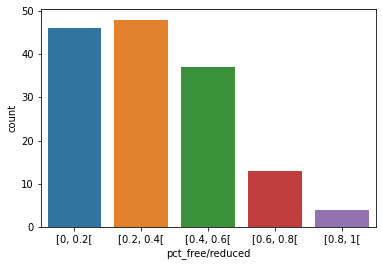

In [48]:
sns.countplot(data= districts, x = "pct_free/reduced")
plt.show()

In [ ]:
#county_connections_ratio

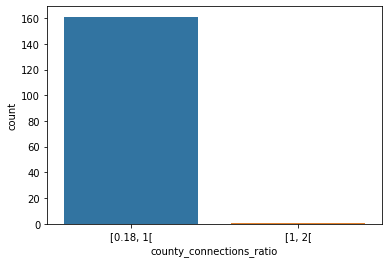

In [49]:
sns.countplot(data= districts, x = "county_connections_ratio")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '[14000, 16000['),
  Text(1, 0, '[6000, 8000['),
  Text(2, 0, '[10000, 12000['),
  Text(3, 0, '[8000, 10000['),
  Text(4, 0, '[12000, 14000['),
  Text(5, 0, '[16000, 18000['),
  Text(6, 0, '[20000, 22000['),
  Text(7, 0, '[18000, 20000['),
  Text(8, 0, '[22000, 24000['),
  Text(9, 0, '[4000, 6000['),
  Text(10, 0, '[32000, 34000[')])

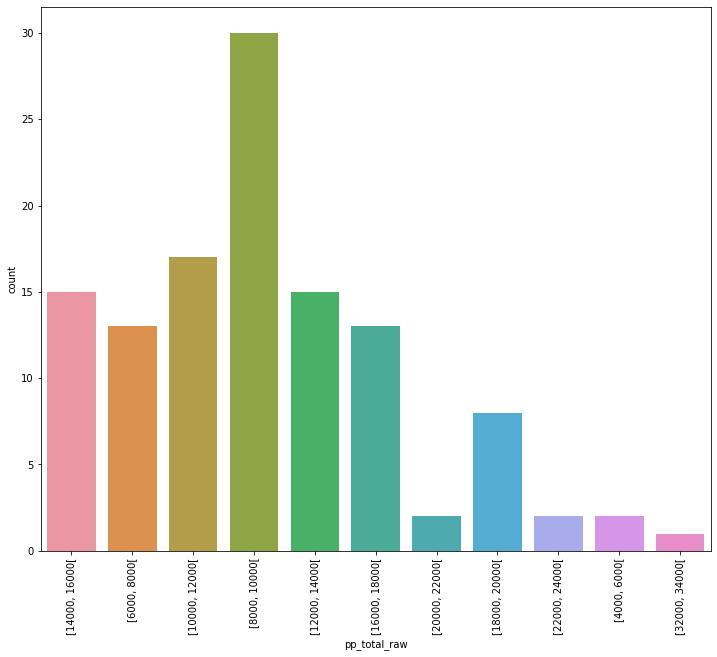

In [50]:
plt.figure(figsize=(12,10))
sns.countplot(districts.pp_total_raw)
plt.xticks(rotation=90)

In [ ]:
#Visualization of Products data

In [ ]:
#Distribution of Sector(s) in the District Information Data

In [62]:
ds = products['Sector(s)'].value_counts().reset_index()
ds.columns = [
    'Sector(s)', 
    'percent'
]
ds['percent'] /= len(products)

fig = px.pie(
    ds, 
    names='Sector(s)', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Distribution of Sector(s) in the District Information Data:', 
    width=700,
    height=500
)
fig.show()

(-0.5, 1439.5, 1079.5, -0.5)

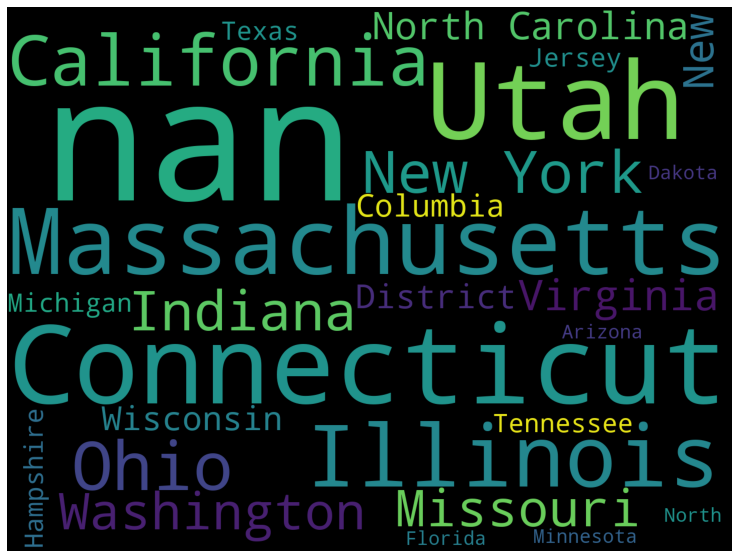

In [52]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(districts['state'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# Top 10 Tech Products

Text(0.5, 1.0, 'With number of page-load per 1000 students')

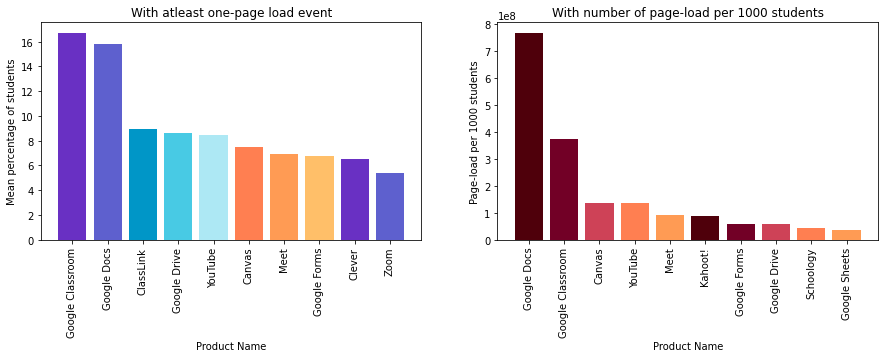

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
engagement.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(engagement, products, on= "LP ID")
m=merged.groupby("Product Name")["pct_access"].mean().sort_values(ascending=False).head(10)

engagement.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(engagement, products, on= "LP ID")
n=merged.groupby("Product Name")["engagement_index"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.bar(m.index, m.values, color=["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Mean percentage of students')
plt.title("With atleast one-page load event")

plt.subplot(122)
plt.bar(n.index, n.values, color=["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Page-load per 1000 students')
plt.title("With number of page-load per 1000 students")

<AxesSubplot:>

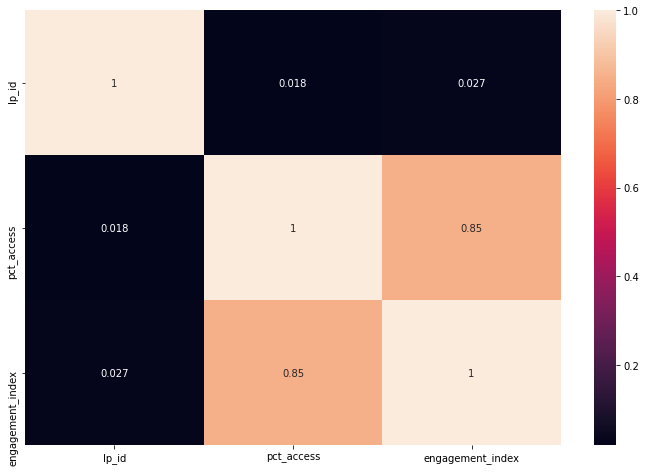

In [58]:
# Bivarient Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True)

In [ ]:
# Merging Files

In [24]:
engagement['time'] = pd.to_datetime(engagement['time'])

In [25]:
print(products["LP ID"].nunique())
print(engagement["lp_id"].nunique())

372
8646


In [26]:
products_engagement = pd.merge(products, engagement, left_on='LP ID', right_on='lp_id')
products_engagement.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,lp_id,pct_access,engagement_index
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-02,13117.0,0.11,7.03
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-03,13117.0,0.01,0.11
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-06,13117.0,0.05,4.76
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-07,13117.0,0.12,14.74
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-09,13117.0,0.01,0.11


In [27]:
class_doc=products_engagement[(products_engagement["Product Name"]=="Google Classroom")|(products_engagement["Product Name"]=="Google Docs")]
pct=class_doc.groupby(["time", "Product Name"])["pct_access"].mean().to_frame().reset_index()
eng=class_doc.groupby(["time", "Product Name"])["engagement_index"].sum().to_frame().reset_index()
# plot
fig = px.line(pct, x="time", y="pct_access", color='Product Name',title='Percentage of students with atleast one-page load event on a given day',
              template="ggplot2", width=800, height=400)
fig.show()

fig = px.line(eng, x="time", y="engagement_index",title='Sum of number of page-load per 1000 students on a given day', color='Product Name',
              template="seaborn", width=800, height=400)
fig.show()

In [ ]:
#XGboost Model

In [70]:

from pandas import read_csv
from matplotlib import pyplot
# read dataset
products_engagement



,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,lp_id,pct_access,engagement_index
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-02,13117.0,0.11,7.03
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-03,13117.0,0.01,0.11
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-06,13117.0,0.05,4.76
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-07,13117.0,0.12,14.74
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-09,13117.0,0.01,0.11
...,...,...,...,...,...,...,...,...,...,...
11691582,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-27,87841.0,0.10,2.99
11691583,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-28,87841.0,0.10,1.00
11691584,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-29,87841.0,0.10,1.00
11691585,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-30,87841.0,0.05,0.50


In [72]:
import datetime
df[['year','month','date']] = df['time'].apply(lambda x : pd.Series(str(x).split('-')))

In [73]:
df.head()

,time,lp_id,pct_access,engagement_index,year,month,date
0,2020-01-01,92871,0.17,5.87,2020,01,01
1,2020-01-01,32213,0.34,36.04,2020,01,01
2,2020-01-01,13496,0.17,2.51,2020,01,01
3,2020-01-01,99916,0.08,0.84,2020,01,01
4,2020-01-01,16164,0.08,3.35,2020,01,01


In [74]:
from sklearn.impute import SimpleImputer
df1 = df.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df1.iloc[:,:] = mean_imputer.fit_transform(df1)

In [75]:
from sklearn.preprocessing import LabelEncoder

#fill in mean for floats
for c in df1.columns:
    if df1[c].dtype=='float16' or  df1[c].dtype=='float32' or  df1[c].dtype=='float64':
        df1[c].fillna(df[c].mean())

#fill in -999 for categoricals
df1 = df1.fillna(-999)
# Label Encoding
for f in df1.columns:
    if df1[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df1[f].values))
        df1[f] = lbl.transform(list(df1[f].values))
        
print('Labelling done.')

Labelling done.


In [76]:
# lets create a feature matrix
feature_names =    ['engagement_index','perc_access', 'month', 'date']

In [78]:
# define function for creating y
def yfromX(X):
    y = X['engagement_index'] + X['perc_access']**2 + np.sin(3 * X['month']) + (X['date'])
    return y

In [79]:
from sklearn.model_selection import train_test_split

# create x and y
np.random.seed(0)

X = pd.DataFrame(np.random.normal(size = (20000, len(feature_names))), columns = feature_names)
y = yfromX(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from eli5.sklearn import PermutationImportance

In [81]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

lr_train_mae = mean_absolute_error(y_train, lr_train_preds)
lr_test_mae = mean_absolute_error(y_test, lr_test_preds)

lr_fi = PermutationImportance(lr, cv = 'prefit', n_iter = 3).fit(X_train, y_train).feature_importances_

In [82]:
# Random Forest 
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_fi = rf.feature_importances_

In [83]:
# Light GBM
lgb = LGBMRegressor(max_depth=5)
lgb.fit(X_train, y_train)

lgb_train_preds = lgb.predict(X_train)
lgb_test_preds = lgb.predict(X_test)

lgb_train_mae = mean_absolute_error(y_train, lgb_train_preds)
lgb_test_mae = mean_absolute_error(y_test, lgb_test_preds)

lgb_fi = lgb.feature_importances_

In [84]:
from boruta import BorutaPy

new_rf = RandomForestRegressor(n_jobs = -1, max_depth = 5)

boruta_selector = BorutaPy(new_rf, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X_train), np.array(y_train))

boruta_ranking = boruta_selector.ranking_
selected_features = np.array(feature_names)[boruta_ranking <= 2]

In [85]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=X_train.columns.values, columns=['values'])
boruta_ranking['Variable'] = boruta_ranking.index
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as mtick

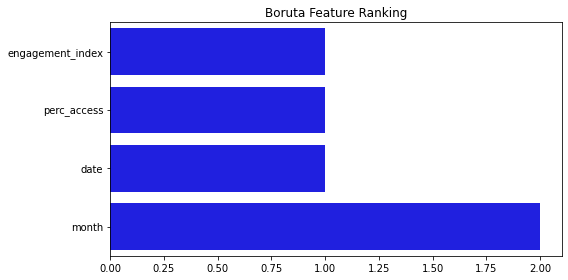

In [89]:

fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='values',y='Variable',data=boruta_ranking, color='b')
plt.title('Boruta Feature Ranking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()